In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Activation
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir = "C:/Users/arnav/OneDrive/Desktop/Arnav/ML/Cats vs Dogs/dogs_vs_cats/train"
test_dir = "C:/Users/arnav/OneDrive/Desktop/Arnav/ML/Cats vs Dogs/dogs_vs_cats/test"

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [4]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (150,150),
                                               batch_size = 32,
                                               class_mode = 'binary',
                                               shuffle = True,
                                               subset = 'training',
                                               seed = 42
)
test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size = (150,150),
                                               batch_size = 32,
                                               class_mode = 'binary',
                                               shuffle = False,
                                               subset = 'validation',
                                               seed = 42
)

Found 20000 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


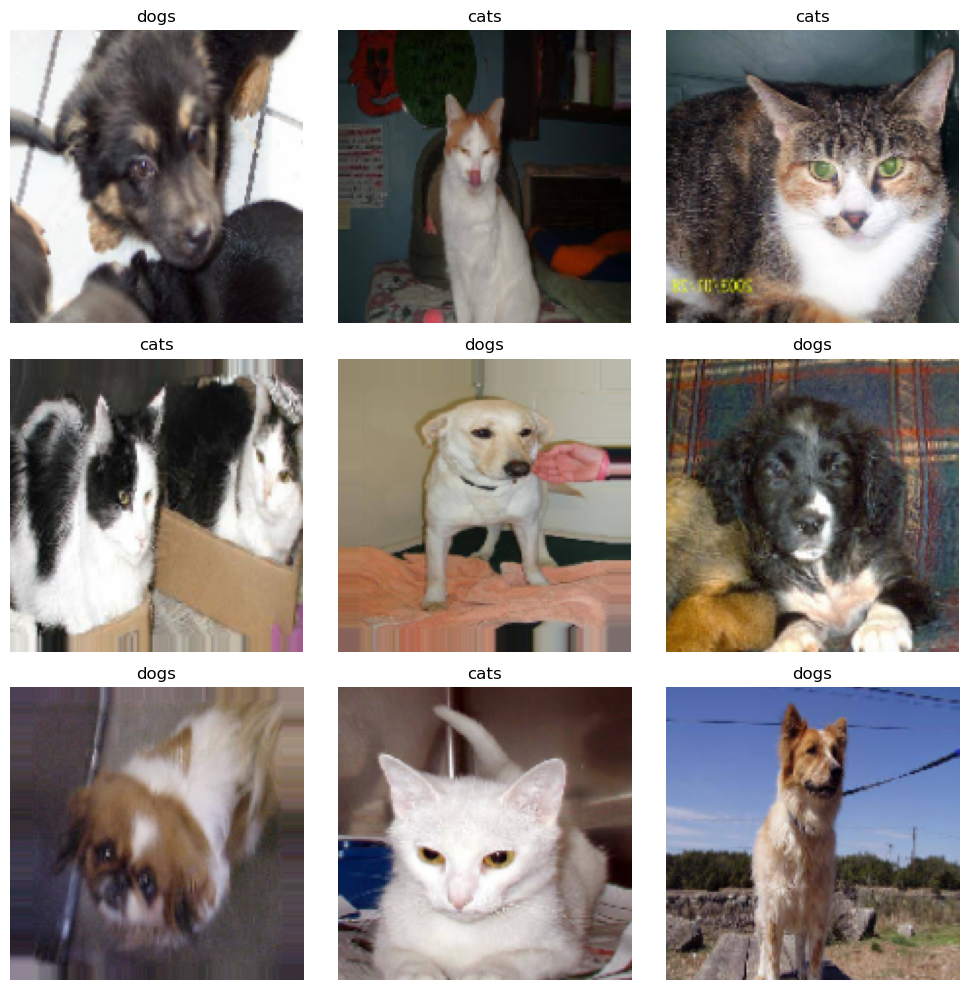

In [5]:
class_names_t = ["cats", "dogs"]
n_images = 10
plt.figure(figsize=(10, 10))
# DictionaryIterator
images, labels = train_data.next()
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(class_names_t[labels[i].astype("uint8")])
    plt.axis("off")
    i+=1
    if i>=(n_images+1):
        break
plt.tight_layout()
plt.show()

In [7]:
from keras import backend as K
if K.image_data_format() == 'channels_first':
    input_shape = (3, 150, 150)
else:
    input_shape = (150, 150, 3)
    
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape, activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 128)     

In [8]:
model.fit_generator(
    train_data,
    steps_per_epoch=20000 // 200,
    epochs=10,
    validation_data=test_data,
    validation_steps=5000 // 200)

C:\Users\arnav\AppData\Local\Temp\ipykernel_18056\806164958.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/10
100/100 [==============================] - 84s 833ms/step - loss: 0.7026 - accuracy: 0.5141
Epoch 2/10
100/100 [==============================] - 94s 931ms/step - loss: 0.6823 - accuracy: 0.5581
Epoch 3/10
100/100 [==============================] - 88s 878ms/step - loss: 0.6572 - accuracy: 0.6094
Epoch 4/10
100/100 [==============================] - 83s 824ms/step - loss: 0.6272 - accuracy: 0.6594
Epoch 5/10
100/100 [==============================] - 86s 858ms/step - loss: 0.6070 - accuracy: 0.6700
Epoch 6/10
100/100 [==============================] - 77s 763ms/step - loss: 0.6085 - accuracy: 0.6837
Epoch 7/10
100/100 [==============================] - 79s 787ms/step - loss: 0.5949 - accuracy: 0.6938
Epoch 8/10
100/100 [==============================] - 71s 706ms/step - loss: 0.5754 - accuracy: 0.6956
Epoch 9/10
100/100 [==============================] - 71s 710ms/step - loss: 0.5666 - accuracy: 0.7163
Epoch 10/10
100/100 [==============================] - 68s 676ms/step - l

In [9]:
model.save("catsndogs.h5")

In [ ]:
t